# Data Science Competition - Capgemini 

## Group 5: Alex Dometrius, Andrew Romano, Chris Ponmanissery, Darrell Bowdon, Nader Ahmed

### The University of Texas at Dallas 
### ITSS 4353 - Dr. Kelly Slaughter 
### Fall 2016

#### Below is a selection of models built for the competition. The goal of this competition is to develop a classification model to predict whether a well is running or not given a set of well attributes.Our group used R to explore and tidy the data before bringing it into this notebook. The intent of this notebook is to provide a condensed understanding of our group's findings. Enjoy!

Note: the use of the following imports are required to view everything in this notebook:
ggplot, which can be installed using the following in the command prompt: "conda install -c conda-forge ggplot"

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
import matplotlib as mpl

In [51]:
cleanishdata = pd.read_excel("cleanishdata.xlsx")
cleanishdata.head()

,well.id,field,block,esp.sr.no,vendor,depth,bean,perf,date.install,water.cut,...,time,Ti.C,Pi.Psia,Vx.g,Vy.g,Tm.C,MOR.Ohm,Lv.V,perf.variance,days.since.install
1,SS-A,SIRHAN,A1,ESP001,Vendor 1,2370,4.5,1895- 1997,1998-01-10,0.38,...,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,0.684238,102,6839
2,SS-B,SIRHAN,B1,ESP002,Vendor 2,1740,4.5,1395- 1433,2005-11-04,0.34,...,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,0.684238,38,3984
3,SS-C101,SIRHAN,C1,ESP003,Vendor 1,1995,10.0,1427-1479,2003-01-31,0.40,...,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,0.684238,52,4992
4,SS-C102,SIRHAN,A1,ESP004,Vendor 3,1790,5.0,1424-1480,2004-09-07,0.55,...,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,0.684238,56,4407
5,SS-C103,SIRHAN,B1,ESP005,Vendor 1,2140,10.0,1442 – 1492,2009-04-11,0.55,...,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,0.684238,50,2730


##### Using R, we first began by searching for NA values. We discovered that only two columns contained all of the NA values: Region, and Ti.C. As Region contained only values that are US, we felt that it was simpler to remove this column all together. There were 200 rows with NA values in the Ti.C column which accounts for 0.3% of the total number of rows in the data set. We felt it would be simplest to remove the rows that contained the NA values. But, as curious data scientists, we also created a new dataframe that contained the Ti.C NA values that were changed to a stochastic average of the Ti.C column. After further review, this change had little to no effect on our results, so we continued with the former approach. 

##### Because we need a binomial variable for our classification methods, we have decided to change every status of "warning" to "down". We feel this is the best approach for two reasons:
##### 1) We are trying to predict when a well is down. A warning status means that the well is already experiencing an issue, and therefore, already requires maintenance or observation.
##### 2) When visualizing the data, there is already a large percentage of running status's. If we instead changed the warning status's to running, our model may overwhelmingly predict a running status, which inhibits our goal. 

###### Here is a representation of status by vendor with warnings changed to down

C:\Users\Nelson\Anaconda3\lib\site-packages\ggplot\ggplot.py:602: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



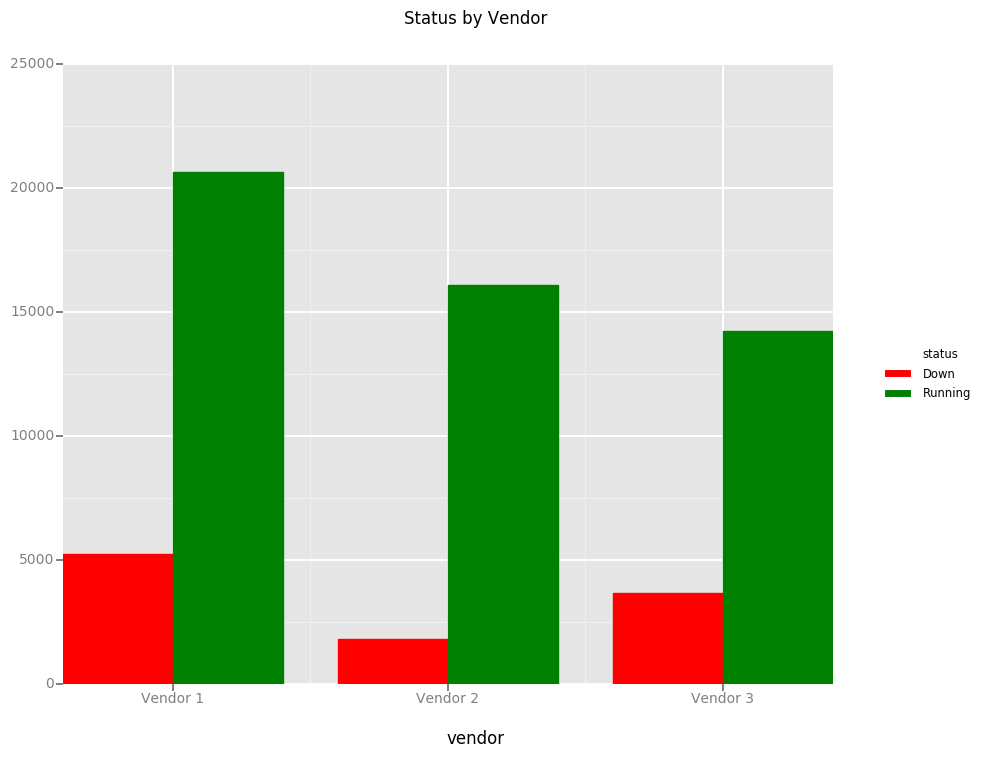

<ggplot: (18432211)>

In [108]:
color_list = ['red', 'green']

qplot(x = 'vendor', data = cleanishdata, fill = 'status', geom = 'bar', main = "Status by Vendor", position = 'stack') +\
scale_fill_manual(values = color_list) 

In [ ]:
ggplot(cleanishdata, aes(x = 'vendor', fill = color_list)) +\
geom_bar()

### Here we have selected the knn method that we beleive is the best to predict whether a well is running or down. Because of the nature of knn using "neighbors" to make preditions, it made the most sense to our group to break the "models" down by attributes such as Vendor, Field, and Bock. After conducting several tests using varying numbers of nearest neighbors, we feel that we get the best results when we plit the models up by vendor and use 7 nearest neighbors. 
### Below are the results for Vendor 1, 2, and 3.  

In [97]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

attributes_columns = ["depth","water.cut","daily.flow","num.work.orders","avg.maintenance.cost.monthly","avg.uptime",
                      "daily.production.variance","Ti.C","Pi.Psia","Vx.g", "Vy.g","Tm.C","MOR.Ohm","Lv.V","perf.variance"]
labels = ['Running', 'Down']

#### Vendor 1: 96.49%

In [102]:
vendor1 = cleanishdata[cleanishdata["vendor"] == "Vendor 1"]
vendor1_train, vendor1_test = train_test_split(vendor1, test_size = 0.3)
vendor1_attributes = vendor1_train[list(attributes_columns)].values
vendor1_class_label = vendor1_train["status"].values

vendor1_Knn_model = neighbors.KNeighborsClassifier(n_neighbors = 7)
vendor1_Knn_model.fit(vendor1_attributes, vendor1_class_label)

vendor1_prediction = vendor1_Knn_model.predict(vendor1_test[attributes_columns])


vendor1_accuracy_prediction = confusion_matrix(vendor1_test['status'],vendor1_prediction, labels)
vendor1_accuracy_prediction.diagonal().sum().astype(int)/vendor1_accuracy_prediction.sum().astype(int)

0.90002576655501154

#### Vendor 2: 95.62%

In [103]:
vendor2 = cleanishdata[cleanishdata["vendor"] == "Vendor 2"]
vendor2_train, vendor2_test = train_test_split(vendor2, test_size = 0.3)
vendor2_attributes = vendor2_train[list(attributes_columns)].values
vendor2_class_label = vendor2_train["status"].values

vendor2_Knn_model = neighbors.KNeighborsClassifier(n_neighbors = 7)
vendor2_Knn_model.fit(vendor2_attributes, vendor2_class_label)

vendor2_prediction = vendor2_Knn_model.predict(vendor2_test[attributes_columns])


vendor2_accuracy_prediction = confusion_matrix(vendor2_test['status'],vendor2_prediction, labels)
vendor2_accuracy_prediction.diagonal().sum().astype(int)/vendor2_accuracy_prediction.sum().astype(int)

0.89200743494423795

#### Vendor 3: 87.77%

In [104]:
vendor3 = cleanishdata[cleanishdata["vendor"] == "Vendor 3"]
vendor3_train, vendor3_test = train_test_split(vendor3, test_size = 0.3)
vendor3_attributes = vendor3_train[list(attributes_columns)].values
vendor3_class_label = vendor3_train["status"].values

vendor3_Knn_model = neighbors.KNeighborsClassifier(n_neighbors = 7)
vendor3_Knn_model.fit(vendor3_attributes, vendor3_class_label)

vendor3_prediction = vendor3_Knn_model.predict(vendor3_test[attributes_columns])


vendor3_accuracy_prediction = confusion_matrix(vendor3_test['status'],vendor3_prediction, labels)
vendor3_accuracy_prediction.diagonal().sum().astype(int)/vendor3_accuracy_prediction.sum().astype(int)

0.77806691449814125

### Here we have the logistic regression model that performed the "best" predictions using the variables of depth, water cut, daily flow, number of work orders, average monthly maintenance cost (with outliers removed), average uptime, vertical and axial vibrations, and range of perforation values. 
#### This model yeilds 82.7% accuracy of predicting whether a well is running or not.

In [46]:
from sklearn import linear_model

In [52]:
cleanishdata_train, cleanishdata_test = train_test_split(cleanishdata, test_size = 0.3)

In [53]:
my_logistic_model = linear_model.LogisticRegression()

In [56]:
attributes_columns = ["depth", "water.cut", "daily.flow", "num.work.orders","avg.maintenance.cost.monthly",
                      "avg.uptime", "Vx.g", "Vy.g", "perf.variance"]
attributes = cleanishdata_train[list(attributes_columns)].values
class_label = cleanishdata_train["status"].values

In [57]:
my_logistic_model.fit(attributes, class_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
prediction_glm = my_logistic_model.predict(cleanishdata_test[attributes_columns])

In [59]:
accuracy_array_glm = confusion_matrix(cleanishdata_test['status'], prediction_glm)

In [60]:
accuracy_array_glm.diagonal().sum().astype(int)/accuracy_array_glm.sum().astype(int)

0.82653061224489799

### Last, we have our decision tree models. We decided to simply enclose some plots of the "better" models created in R.

#### Due to the number of levels of ESP serial numbers, R creates aliases when representing these values in the tree. Below the plot is the summary of the tree which explains what variables these aliases are represening.
##### 87% accuracy 

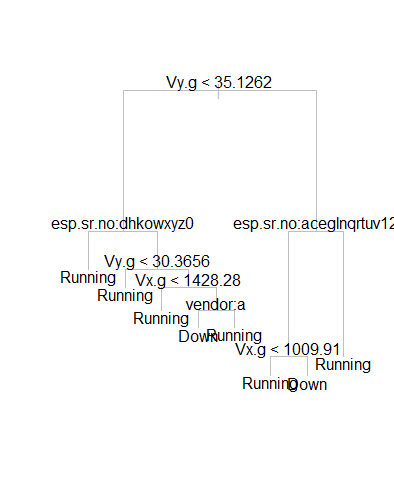

In [111]:
from IPython.display import Image
Image(filename='dtree1.png')

root 43216 39950.0 Running ( 0.17406 0.82594 )  
   2) Vy.g < 35.1262 35008 25480.0 Running ( 0.11849 0.88151 )  
     4) esp.sr.no: ESP004,ESP008,ESP011,ESP015,ESP023,ESP024,ESP025,ESP026,ESP027 10230 10330.0 Running ( 0.20332 0.79668 ) *
     5) esp.sr.no: ESP001,ESP002,ESP003,ESP005,ESP006,ESP007,ESP009,ESP010,ESP012,ESP013,ESP014,ESP016,ESP017,ESP018,ESP019,ESP020,ESP021,ESP022,ESP028,ESP029,ESP030,ESP031 24778 14230.0 Running ( 0.08346 0.91654 )  
      10) Vy.g < 30.3656 22488 11400.0 Running ( 0.06995 0.93005 ) *
      11) Vy.g > 30.3656 2290  2391.0 Running ( 0.21616 0.78384 )  
        22) Vx.g < 1428.28 1528   790.8 Running ( 0.07199 0.92801 ) *
        23) Vx.g > 1428.28 762  1056.0 Down ( 0.50525 0.49475 )  
          46) vendor: Vendor 1 460   481.7 Down ( 0.78261 0.21739 ) *
          47) vendor: Vendor 2 302   172.4 Running ( 0.08278 0.91722 ) *
   3) Vy.g > 35.1262 8208 11120.0 Running ( 0.41106 0.58894 )  
     6) esp.sr.no: ESP001,ESP003,ESP005,ESP007,ESP012,ESP014,ESP017,ESP018,ESP020,ESP021,ESP022,ESP028,ESP029 3437  3845.0 Down ( 0.75269 0.24731 )  
      12) Vx.g < 1009.91 281   269.2 Running ( 0.18505 0.81495 ) *
      13) Vx.g > 1009.91 3156  3130.0 Down ( 0.80323 0.19677 ) *
     7) esp.sr.no: ESP002,ESP004,ESP006,ESP008,ESP009,ESP010,ESP011,ESP013,ESP015,ESP016,ESP019,ESP023,ESP024,ESP025,ESP026,ESP027,ESP030,ESP031 4771  4273.0 Running ( 0.16495 0.83505 ) *

#### The next decision tree model does not contain the ESP serial number. This model seems to favor the vendor. 
##### 87.8% accuracy

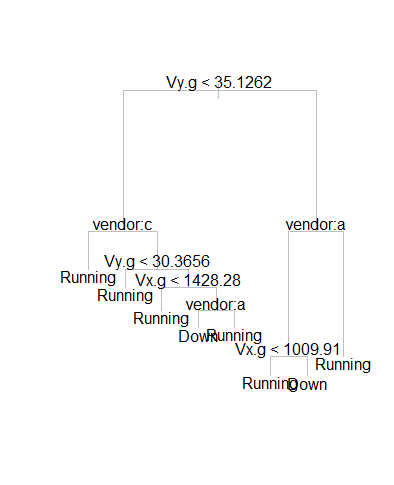

In [113]:
Image(filename='dtree2.png')

1) root 43216 39950.0 Running ( 0.17406 0.82594 )  
   2) Vy.g < 35.1262 35008 25480.0 Running ( 0.11849 0.88151 )  
     4) vendor: Vendor 3 10230 10330.0 Running ( 0.20332 0.79668 ) *
     5) vendor: Vendor 1,Vendor 2 24778 14230.0 Running ( 0.08346 0.91654 )  
      10) Vy.g < 30.3656 22488 11400.0 Running ( 0.06995 0.93005 ) *
      11) Vy.g > 30.3656 2290  2391.0 Running ( 0.21616 0.78384 )  
        22) Vx.g < 1428.28 1528   790.8 Running ( 0.07199 0.92801 ) *
        23) Vx.g > 1428.28 762  1056.0 Down ( 0.50525 0.49475 )  
          46) vendor: Vendor 1 460   481.7 Down ( 0.78261 0.21739 ) *
          47) vendor: Vendor 2 302   172.4 Running ( 0.08278 0.91722 ) *
   3) Vy.g > 35.1262 8208 11120.0 Running ( 0.41106 0.58894 )  
     6) vendor: Vendor 1 3437  3845.0 Down ( 0.75269 0.24731 )  
      12) Vx.g < 1009.91 281   269.2 Running ( 0.18505 0.81495 ) *
      13) Vx.g > 1009.91 3156  3130.0 Down ( 0.80323 0.19677 ) *
     7) vendor: Vendor 2,Vendor 3 4771  4273.0 Running ( 0.16495 0.83505 ) *

####  With both ESP and Vendor excluded from this tree model, block seems to play an important role
##### 85.7% accuracy

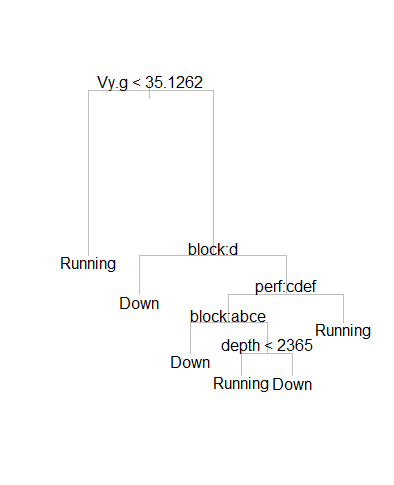

In [115]:
Image(filename='dtree4.png')

1) root 43216 39950.0 Running ( 0.1741 0.8259 )  
   2) Vy.g < 35.1262 35008 25480.0 Running ( 0.1185 0.8815 ) *
   3) Vy.g > 35.1262 8208 11120.0 Running ( 0.4111 0.5889 )  
     6) block: C1 1350  1506.0 Down ( 0.7541 0.2459 ) *
     7) block: A1,B1,B2,C3,D1,D9 6858  8824.0 Running ( 0.3435 0.6565 )  
      14) perf: 1424-1480,1427-1479,1442 – 1492,1895- 1997 4491  6159.0 Running ( 0.4389 0.5611 )  
        28) block: A1,B1,B2,C3 2615  3534.0 Down ( 0.5931 0.4069 ) *
        29) block: D1,D9 1876  1995.0 Running ( 0.2239 0.7761 )  
          58) depth < 2365 1618  1275.0 Running ( 0.1341 0.8659 ) *
          59) depth > 2365 258   267.4 Down ( 0.7868 0.2132 ) *
      15) perf: 1395- 1433,1418-1470 2367  2102.0 Running ( 0.1627 0.8373 ) *

#### This model excludes ESP, Vendor, and Block.
##### 84.7% accuracy

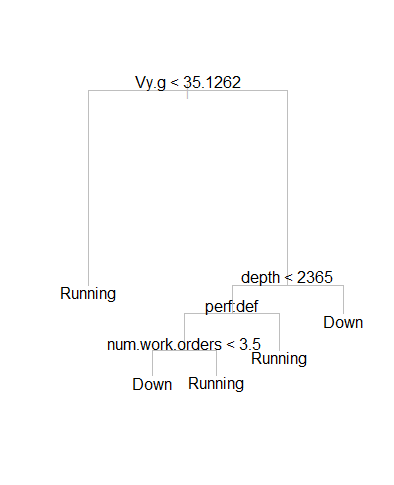

In [116]:
Image(filename='dtree5.png')

1) root 43216 39950.0 Running ( 0.1741 0.8259 )  
   2) Vy.g < 35.1262 35008 25480.0 Running ( 0.1185 0.8815 ) *
   3) Vy.g > 35.1262 8208 11120.0 Running ( 0.4111 0.5889 )  
     6) depth < 2365 7400  9766.0 Running ( 0.3718 0.6282 )  
      12) perf: 1427-1479,1442 – 1492,1895- 1997 4252  5893.0 Running ( 0.4918 0.5082 )  
        24) num.work.orders < 3.5 1051  1153.0 Down ( 0.7621 0.2379 ) *
        25) num.work.orders > 3.5 3201  4316.0 Running ( 0.4030 0.5970 ) *
      13) perf: 1395- 1433,1418-1470,1424-1480 3148  3233.0 Running ( 0.2097 0.7903 ) *
     7) depth > 2365 808   869.4 Down ( 0.7710 0.2290 ) *

#### This last decision tree model excludes ESP, Vendor, Perf, and Block. 
##### 83.5% accuracy

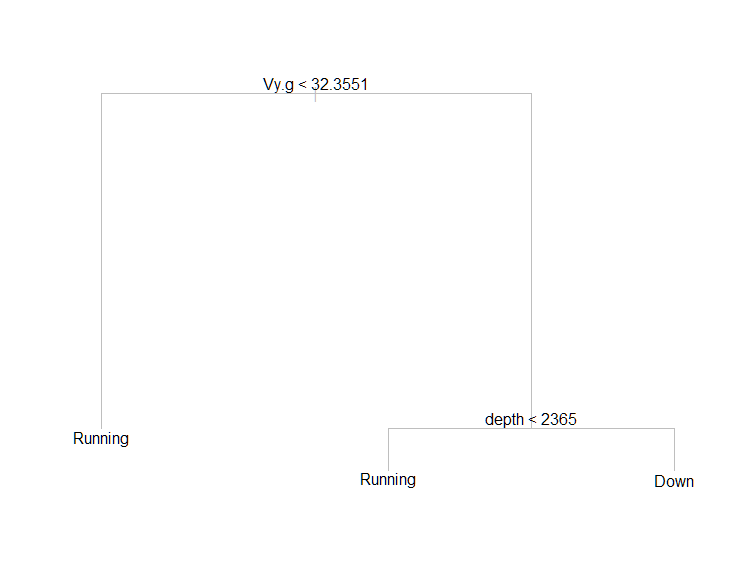

In [117]:
Image(filename='dtree5_guide.png')